# Preface:
# Please read the outputs of the cells for answers that are calculations. 
# You must be connected to the internet to use yfinance

# 1. Historical Analysis of Sector ETFs:
## a. Download historical price data from January 1st 2010 for the following ETFs on yahoo
## finance or another site of your choice. Clean/check the data for splits and other
## anomalies.

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sklearn as skl

In [2]:
end_date = dt.datetime.today()
start_date = dt.datetime(2010, 1, 1)

tickers = {
"SPY" : yf.Ticker("SPY").history(start=start_date, end=end_date).dropna(),
"XLB" : yf.Ticker("XLB").history(start= start_date, end=end_date).dropna(),
"XLE" : yf.Ticker("XLE").history(start= start_date, end=end_date).dropna(),
"XLF" : yf.Ticker("XLF").history(start= start_date, end=end_date).dropna(),
"XLI" : yf.Ticker("XLI").history(start= start_date, end=end_date).dropna(),
"XLK" : yf.Ticker("XLK").history(start= start_date, end=end_date).dropna(),
"XLP" : yf.Ticker("XLP").history(start= start_date, end=end_date).dropna(),
"XLU" : yf.Ticker("XLU").history(start= start_date, end=end_date).dropna(),
"XLY" : yf.Ticker("XLY").history(start= start_date, end=end_date).dropna()
}

## B. Calculate the annualized return and standard deviation of each ETF

In [3]:
# Note that there is no data for 01/01/2010

first_day = tickers["SPY"].index[0]
last_day = tickers["SPY"].index[-1]

delta_t = (last_day - first_day).days

print(delta_t)
annualized_returns = {}
standard_deviations = {}

for etf in tickers:
    cum_return = tickers[etf]["Close"][-1]/tickers[etf]["Close"][0] - 1
    annualized_returns[etf] = (cum_return + 1)**(252/delta_t)-1

    # standard deviation
    standard_deviations[etf] = tickers[etf]["Close"].std()

    print(f"The annualized return for {etf} is {annualized_returns[etf]} \n and the standard deviation is {standard_deviations[etf]}")


5432
The annualized return for SPY is 0.09310716722260493 
 and the standard deviation is 130.4105791563456
The annualized return for XLB is 0.06280046266244854 
 and the standard deviation is 20.30179797301033
The annualized return for XLE is 0.04624640914595424 
 and the standard deviation is 15.603000506591174
The annualized return for XLF is 0.08197975435240323 
 and the standard deviation is 10.031375115307158
The annualized return for XLI is 0.0907070438390074 
 and the standard deviation is 29.1906445314536
The annualized return for XLK is 0.12271214505573136 
 and the standard deviation is 58.1478878507995
The annualized return for XLP is 0.07209223254002084 
 and the standard deviation is 17.887464738566308
The annualized return for XLU is 0.07009133568589654 
 and the standard deviation is 16.592462016645243
The annualized return for XLY is 0.1052235307703755 
 and the standard deviation is 51.771496052476394


/var/folders/49/1jq9sd950fg6397s7sm972380000gn/T/ipykernel_79424/2174164327.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_return = tickers[etf]["Close"][-1]/tickers[etf]["Close"][0] - 1


## C. Calculate the covariance matrix of daily and monthly returns. Comment on the differences in correlations at different frequencies

In [4]:
daily_returns = {}
weekly_returns = {}

# setting up the daily/weekly returns
for etf in tickers:
    weekly_returns[etf] = (tickers[etf]["Close"]/tickers[etf]["Close"].shift(5) - 1).dropna()
    #I use 5 instead of 7 because there are 5 days in the trading week
    daily_returns[etf] = (tickers[etf]["Close"]/tickers[etf]["Close"].shift(1) - 1)

length = len(weekly_returns[etf])
covariances = {}
for etf in tickers:
    covariances[etf] = pd.DataFrame({"weekly_returns": weekly_returns[etf], "daily_returns" : daily_returns[etf][-length:]}).cov()

covariances

{'SPY':                 weekly_returns  daily_returns
 weekly_returns        0.000503       0.000102
 daily_returns         0.000102       0.000116,
 'XLB':                 weekly_returns  daily_returns
 weekly_returns        0.000825       0.000162
 daily_returns         0.000162       0.000173,
 'XLE':                 weekly_returns  daily_returns
 weekly_returns        0.001467       0.000293
 daily_returns         0.000293       0.000300,
 'XLF':                 weekly_returns  daily_returns
 weekly_returns        0.000855       0.000173
 daily_returns         0.000173       0.000195,
 'XLI':                 weekly_returns  daily_returns
 weekly_returns        0.000713       0.000137
 daily_returns         0.000137       0.000151,
 'XLK':                 weekly_returns  daily_returns
 weekly_returns        0.000746       0.000154
 daily_returns         0.000154       0.000180,
 'XLP':                 weekly_returns  daily_returns
 weekly_returns        0.000305       0.000061
 dail

<div class="alert alert-block alert-success">
<b>Response:</b> Looking at the different covariance matrices, it seems that the covariances of the weekly returns and daily returns are very small,  
showing that their correlations are also very small given the small variances.
</div>

## d. Calculate a rolling 90-day correlation of each sector ETF with the S&P index. Do the
## correlations appear to be stable over time? What seems to cause them to vary the
## most?

In [5]:
rolling_correlations = {}

for etf in tickers:
    rolling_correlations[etf] = (daily_returns[etf].rolling(90).corr(daily_returns["SPY"])).dropna()

rolling_correlations

{'SPY': Date
 2010-05-13 00:00:00-04:00    1.0
 2010-05-14 00:00:00-04:00    1.0
 2010-05-17 00:00:00-04:00    1.0
 2010-05-18 00:00:00-04:00    1.0
 2010-05-19 00:00:00-04:00    1.0
                             ... 
 2024-11-12 00:00:00-05:00    1.0
 2024-11-13 00:00:00-05:00    1.0
 2024-11-14 00:00:00-05:00    1.0
 2024-11-15 00:00:00-05:00    1.0
 2024-11-18 00:00:00-05:00    1.0
 Name: Close, Length: 3655, dtype: float64,
 'XLB': Date
 2010-05-13 00:00:00-04:00    0.878382
 2010-05-14 00:00:00-04:00    0.881646
 2010-05-17 00:00:00-04:00    0.887455
 2010-05-18 00:00:00-04:00    0.892327
 2010-05-19 00:00:00-04:00    0.892507
                                ...   
 2024-11-12 00:00:00-05:00    0.713351
 2024-11-13 00:00:00-05:00    0.718780
 2024-11-14 00:00:00-05:00    0.717439
 2024-11-15 00:00:00-05:00    0.747763
 2024-11-18 00:00:00-05:00    0.746762
 Name: Close, Length: 3655, dtype: float64,
 'XLE': Date
 2010-05-13 00:00:00-04:00    0.901772
 2010-05-14 00:00:00-04:00    0

<div class="alert alert-block alert-success">
<b>Response:</b> In almost all of the indices, the correlations were a lot higher in 2010 than they are in the present day. Time might play a factor in the correlations
</div>

## e. Consider a single factor CAPM model where returns are composed of the market return
## and an idiosyncratic component:
## $ r_{i,t} = \beta r_{\text{mkt}, i} + \epsilon_{i,t}$

## For each sector ETF, compute it’s $\beta$ to the market using the above model. This will
## require computing a linear regression on stock returns. Compute the $\beta$ for the entire
## historical period and also compute rolling 90-day $\beta$’s. Are the $\beta$’s that you calculated
## consistent over the entire period? How do they compare to the rolling correlations?

In [6]:
total_betas = {}
rolling_betas_90_day = {}

def calculate_beta(x, y):
    r = x.corr(y)
    s_x = x.std()
    s_y = y.std()
    return r*s_y/s_x

for etf in tickers:
    # Calculating beta for the total historical period
    daily_return = daily_returns[etf]
    daily_return_SPY = daily_returns["SPY"]

    total_betas[etf] = calculate_beta(daily_return, daily_return_SPY)

    # Calculating rolling betas
    r_roll  = rolling_correlations[etf]
    s_x_rolling = daily_return.rolling(90).std().dropna()
    s_y_rolling = daily_return_SPY.rolling(90).std().dropna()
    rolling_betas_90_day[etf] = r_roll * s_y_rolling/s_x_rolling

print("Total historical Betas:")
total_betas


Total historical Betas:


{'SPY': 0.9999999999999999,
 'XLB': 0.7079182225280014,
 'XLE': 0.4264107302848067,
 'XLF': 0.6720215845014904,
 'XLI': 0.7970714998298445,
 'XLK': 0.7402227218122699,
 'XLP': 0.9503367251451592,
 'XLU': 0.578270300515202,
 'XLY': 0.7751596814085768}

In [7]:
print("90 day rolling betas:")
rolling_betas_90_day

90 day rolling betas:


{'SPY': Date
 2010-05-13 00:00:00-04:00    1.0
 2010-05-14 00:00:00-04:00    1.0
 2010-05-17 00:00:00-04:00    1.0
 2010-05-18 00:00:00-04:00    1.0
 2010-05-19 00:00:00-04:00    1.0
                             ... 
 2024-11-12 00:00:00-05:00    1.0
 2024-11-13 00:00:00-05:00    1.0
 2024-11-14 00:00:00-05:00    1.0
 2024-11-15 00:00:00-05:00    1.0
 2024-11-18 00:00:00-05:00    1.0
 Name: Close, Length: 3655, dtype: float64,
 'XLB': Date
 2010-05-13 00:00:00-04:00    0.626109
 2010-05-14 00:00:00-04:00    0.629837
 2010-05-17 00:00:00-04:00    0.638611
 2010-05-18 00:00:00-04:00    0.643753
 2010-05-19 00:00:00-04:00    0.647773
                                ...   
 2024-11-12 00:00:00-05:00    0.724403
 2024-11-13 00:00:00-05:00    0.735438
 2024-11-14 00:00:00-05:00    0.736744
 2024-11-15 00:00:00-05:00    0.778768
 2024-11-18 00:00:00-05:00    0.778350
 Name: Close, Length: 3655, dtype: float64,
 'XLE': Date
 2010-05-13 00:00:00-04:00    0.708560
 2010-05-14 00:00:00-04:00    0

<div class="alert alert-block alert-success">
<b>Response:</b> With the exception of XLB and SPY, all of the betas decrease over time, which makes sense since the correlation and beta are proportionate to each other. Notice that the XLU betas are greater than 1 around 2010, and are around .2, meaning a drastic reduction in risk. Notice how the last betas in the rolling betas are significantly less than their corresponding total historical beta
</div>

In [8]:
rolling_betas_90_day

{'SPY': Date
 2010-05-13 00:00:00-04:00    1.0
 2010-05-14 00:00:00-04:00    1.0
 2010-05-17 00:00:00-04:00    1.0
 2010-05-18 00:00:00-04:00    1.0
 2010-05-19 00:00:00-04:00    1.0
                             ... 
 2024-11-12 00:00:00-05:00    1.0
 2024-11-13 00:00:00-05:00    1.0
 2024-11-14 00:00:00-05:00    1.0
 2024-11-15 00:00:00-05:00    1.0
 2024-11-18 00:00:00-05:00    1.0
 Name: Close, Length: 3655, dtype: float64,
 'XLB': Date
 2010-05-13 00:00:00-04:00    0.626109
 2010-05-14 00:00:00-04:00    0.629837
 2010-05-17 00:00:00-04:00    0.638611
 2010-05-18 00:00:00-04:00    0.643753
 2010-05-19 00:00:00-04:00    0.647773
                                ...   
 2024-11-12 00:00:00-05:00    0.724403
 2024-11-13 00:00:00-05:00    0.735438
 2024-11-14 00:00:00-05:00    0.736744
 2024-11-15 00:00:00-05:00    0.778768
 2024-11-18 00:00:00-05:00    0.778350
 Name: Close, Length: 3655, dtype: float64,
 'XLE': Date
 2010-05-13 00:00:00-04:00    0.708560
 2010-05-14 00:00:00-04:00    0

# 2. Option Pricing via Simulation

## Recall that the dynamics of the Black-Scholes model can be written as:
## $\begin{aligned}dS_t &= rS_t dt + σS_t dW_t\end{aligned}$
## And that each Brownian motion increment $dW_t$ is normally distributed with mean zero and
## variance $\Delta t$. Assume that $r = 0$, $S_0 = 100$ and $\sigma = 0.25.$

### a. Generate a series of normally distributed random numbers and use these to generate
### simulated paths for the underlying asset. What is the mean and variance of the terminal
### value of these paths? Does it appear to be consistent with the underlying dynamics?

In [9]:
# Copying the code from the a7task1 from the python refresher course:

class MCStockSimulator:
    """Monte Carlo Simulator Class"""
    def __init__(self, s, t, r, sigma, nper_per_year):
        """s (the current stock price in dollars), 
        t (the option maturity time in years), 
        r (the annualized rate of return on this stock),
        sigma (the annualized standard deviation of returns), 
        nper_per_year (the number of discrete time periods per year)""" 
        
        self.s = s
        self.t = t
        self.r = r
        self.sigma = sigma
        self.nper_per_year = nper_per_year
        
    def __repr__(self):
        return f"""Stock Simulator (s=${self.s:.2f}, t={self.t:.2f} (years), r={self.r:.2f}, sigma={self.sigma:.2f}, nper_per_year={self.nper_per_year}"""
        
    # Problem 2
    def generate_simulated_stock_returns(self):
        """generate and return a np.array (numpy array) containing a sequence 
        of simulated stock returns over the time period t"""
        
        dt = 1/self.nper_per_year
        sigma = self.sigma
        mu = self.r
        Z = np.random.normal(size = int(self.t*self.nper_per_year))
        
        returns = (mu - sigma**2 / 2)*dt+ Z * sigma * np.sqrt(dt)
        
        return returns
        
    def generate_simulated_stock_values(self):
        """generates and returns a np.array (numpy array) containing a sequence 
        of stock values, corresponding to a random sequence of stock return."""
        
        S=[self.s]
        r = self.generate_simulated_stock_returns()
        for i in range(len(r)):
            S += [S[i]*np.exp(r[i])]
        
        return np.array(S)
    
    def plot_simulated_stock_values(self, num_trials = 1):
        """generates a plot of of num_trials series of simulated stock returns. 
        num_trials is an optional parameter; if it is not supplied, the default
        value of 1 will be used"""
        
        t = np.linspace(0,self.t, self.t* self.nper_per_year)
        
                
        if num_trials == 1:
            plt.title(f"{num_trials} simulated trial")
        else:
            plt.title(f"{num_trials} simulated trials")
            
        plt.xlabel("years")
        plt.ylabel("$ value")
        
        for _ in range(num_trials):
            S = self.generate_simulated_stock_values()[:-1]
            plt.plot(t, S)
        
        plt.show()
        plt.clf()

In [10]:
#Can change t and nper_per_year as deemed fit

num_trials = 10
t= 10
r = 0

terminal_values = []
for _ in range(num_trials):
    terminal_values += [MCStockSimulator(s = 100, t = t, r = r, sigma = .25, nper_per_year=1).generate_simulated_stock_values()[-1]]

terminal_values = pd.Series(terminal_values)
sample_mean = terminal_values.mean()
sample_variance = terminal_values.var()

print(f"Mean : {sample_mean}, Variance: {sample_variance}")

Mean : 109.6511369804889, Variance: 6718.815604482934


Properties of Geometric Brownian Motion

$E[S_t] = S_0 e^{\mu t} = S_0\\ Var[S_t] =   S_0^2 e^{2\mu t} \left( e^{\sigma^2t} - 1\right) = S_0^2 \left( e^{10\sigma^2 } -1\right)$ 

In [11]:
print(f"The expected value of S_t = {100} \n The variance of S_t = {100**2 * (np.exp(10*.25**2) - 1)}")

The expected value of S_t = 100 
 The variance of S_t = 8682.459574322223


<div class="alert alert-block alert-success">
<b>Response:</b> The means somewhat line up with the dynamics, since the variance is fairly large. However, the variances are signficantly different
</div>

## b. Calculate the payoff of a European put option with strike 100 along all simulated
## paths. Make a histogram of the payoffs for the European option. What is the mean
## and standard deviation of the payoffs?

0     0.000000
1     0.000000
2    64.539835
3    77.421185
4    14.155045
5    23.258779
6    79.767744
7    25.342432
8     0.000000
9     0.000000
dtype: float64
Mean of payoffs  = 28.44850202494394 
 Standard deviation of payoffs = 33.01973391027613


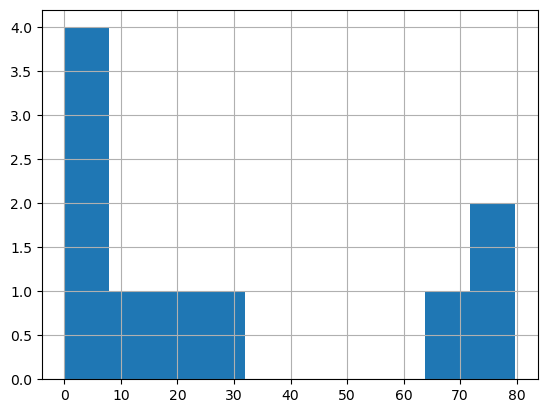

In [12]:
payoff = (100 - terminal_values).apply(lambda x : max(x, 0))
print(payoff)
payoff.hist()
print(f"Mean of payoffs  = {payoff.mean()} \n Standard deviation of payoffs = {payoff.std()}")

## c. Calculate a simulation approximation to the price of a European put option by taking
## the average discounted payoff across all paths.

In [13]:
payoff_mean_discounted = payoff.mean()*np.exp(-r*t)
payoff_mean_discounted

28.44850202494394

<div class="alert alert-block alert-success">
<b>Response:</b> Note that r = 0, meaning there is actually no discount
</div>

## d. Compare the price of the European put option obtained via simulation to the price
## you obtain using the Black-Scholes formula. Comment on any difference between the
## two prices.

In [14]:
def calculcate_black_scholes_put(S, r, T, sigma, K):
    d_1 = 1/(sigma * np.sqrt(T)) *(np.log(S/K) + (r+ sigma**2/2))
    d_2 = d_1 - sigma * np.sqrt(T)

    return sci.stats.norm.cdf(-d_2) * K *np.exp(-r*T) - sci.stats.norm.cdf(-d_1)*S

calculcate_black_scholes_put(S= 100, r= 0, T=t, sigma = .25, K = 100)

28.945146508959056

<div class="alert alert-block alert-success">
<b>Response:</b> This is not the best estimation given our black scholes model produces a different output that is not necessarily comparable. 
</div>